In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [52]:
Data = pd.read_csv('stock_data_AMZN_v4.csv')

In [53]:
Data = Data.drop(Data.columns[0], axis=1)

In [54]:
Data.head()

,Date,Open,High,Low,Close,Volume,EPS (Earnings Per Share),Year_High,Year_Low,Pivot Point,...,EMA10,EMA50,EMA100,EMA12,EMA26,Middle_Band,Upper_Band,Lower_Band,NAV,Price/Nav
0,1/3/2012,8.7945,8.9740,8.7775,8.9515,102216000,0.01,4.231500,-0.1775,8.901000,...,8.951500,8.951500,8.951500,8.951500,8.951500,0.0,0.0,0.0,25278000000,3.54E-10
1,1/4/2012,8.9605,9.0250,8.8035,8.8755,84104000,0.01,4.180500,-0.2035,8.901333,...,8.937682,8.948520,8.949995,8.939808,8.945870,0.0,0.0,0.0,25278000000,3.51E-10
2,1/5/2012,8.7970,8.9125,8.7025,8.8805,76182000,0.01,4.292999,-0.1025,8.831834,...,8.927285,8.945852,8.948619,8.930683,8.941028,0.0,0.0,0.0,25278000000,3.51E-10
3,1/6/2012,8.9035,9.2325,8.8750,9.1305,140168000,0.01,3.973000,-0.2750,9.079333,...,8.964233,8.953093,8.952220,8.961424,8.955063,0.0,0.0,0.0,25278000000,3.61E-10
4,1/9/2012,9.1380,9.2185,8.8500,8.9280,101138000,0.01,3.987000,-0.2500,8.998834,...,8.957645,8.952109,8.951741,8.956282,8.953058,0.0,0.0,0.0,25278000000,3.53E-10


In [55]:
Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2891 entries, 0 to 2890
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Date                      2891 non-null   object 
 1   Open                      2891 non-null   float64
 2   High                      2891 non-null   float64
 3   Low                       2891 non-null   float64
 4   Close                     2891 non-null   float64
 5   Volume                    2891 non-null   int64  
 6   EPS (Earnings Per Share)  2891 non-null   float64
 7   Year_High                 2891 non-null   float64
 8   Year_Low                  2891 non-null   float64
 9   Pivot Point               2891 non-null   float64
 10  Resistance1               2891 non-null   float64
 11  Resistance2               2891 non-null   float64
 12  Support1                  2891 non-null   float64
 13  Support2                  2891 non-null   float64
 14  SMA10   

In [56]:
Data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume',
       'EPS (Earnings Per Share)', 'Year_High', 'Year_Low', 'Pivot Point',
       'Resistance1', 'Resistance2', 'Support1', 'Support2', 'SMA10', 'SMA50',
       'SMA100', 'EMA10', 'EMA50', 'EMA100', 'EMA12', 'EMA26', 'Middle_Band',
       'Upper_Band', 'Lower_Band', 'NAV', 'Price/Nav'],
      dtype='object')

In [57]:
Data.describe().T

,count,mean,std,min,25%,50%,75%,max
Open,2891.0,6.971465e+01,5.338811e+01,8.690500e+00,1.849925e+01,5.029750e+01,1.015220e+02,1.872000e+02
High,2891.0,7.052617e+01,5.404667e+01,8.912500e+00,1.865400e+01,5.049000e+01,1.029025e+02,1.886540e+02
Low,2891.0,6.882431e+01,5.266061e+01,8.600000e+00,1.830300e+01,4.986000e+01,1.003973e+02,1.848395e+02
Close,2891.0,6.968934e+01,5.334194e+01,8.796500e+00,1.846700e+01,5.014700e+01,1.020850e+02,1.865705e+02
Volume,2891.0,7.996044e+07,4.240100e+07,1.762600e+07,5.366900e+07,6.860000e+07,9.245200e+07,4.771220e+08
EPS (Earnings Per Share),2891.0,1.768454e-01,2.951593e-01,-3.800000e-01,1.000000e-02,5.000000e-02,2.900000e-01,1.390000e+00
Year_High,2891.0,1.639478e+01,1.807435e+01,0.000000e+00,4.266000e+00,1.127750e+01,1.990851e+01,8.964000e+01
Year_Low,2891.0,-1.754011e+01,1.925227e+01,-9.303300e+01,-2.154275e+01,-1.218500e+01,-3.740250e+00,0.000000e+00
Pivot Point,2891.0,6.967994e+01,5.334614e+01,8.831834e+00,1.847575e+01,5.018133e+01,1.016968e+02,1.862105e+02
Resistance1,2891.0,7.053556e+01,5.403935e+01,8.918166e+00,1.864242e+01,5.053367e+01,1.030733e+02,1.893613e+02


This is a time series problem actually, Time-series is series of obeservations that are recorded over a period of time. these observations are dependent of time component which can not be neglected thus we have have to analysis the this data keeping time component in mind.

# Components of Time Series

Time series data consist of four components:

Trend Component: This is a variation that moves up or down in a reasonably predictable pattern over a long period.

Seasonality Component: It is the variation that is regular and periodic and repeats itself over a specific period such as a day, week, month, season, etc.

Cyclical Component: is the variation that corresponds with business or economic 'boom-bust' cycles or follows their own peculiar cycles.

Random Component: It is the variation that is erratic or residual and does not fall under any of the above three classifications.

## Closing Price
The closing price is the last price at which the stock is traded during the regular trading day. A stock’s closing price is the standard benchmark used by investors to track its performance over time.

In [58]:
Data['Date'] = pd.to_datetime(Data['Date'])

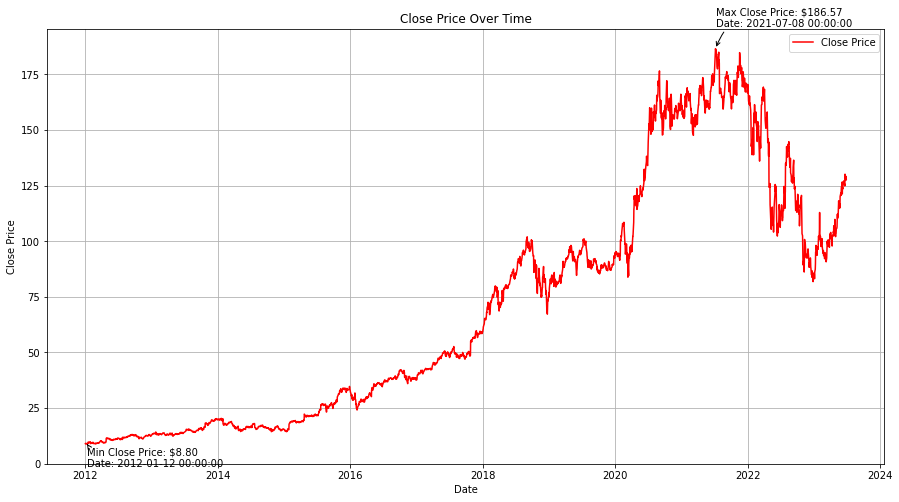

In [59]:
max_price_date = Data['Date'][Data['Close'].idxmax()]
max_price_value = Data['Close'].max()
min_price_date = Data['Date'][Data['Close'].idxmin()]
min_price_value = Data['Close'].min()


plt.figure(figsize=(15, 8))
plt.plot(Data['Date'], Data['Close'], label='Close Price', color='r')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price Over Time')
plt.legend()
plt.grid(True)

plt.annotate(f'Max Close Price: ${max_price_value:.2f}\nDate: {max_price_date}', 
             xy=(max_price_date, max_price_value), 
             xytext=(max_price_date, max_price_value + 10), 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=0.5'))
plt.annotate(f'Min Close Price: ${min_price_value:.2f}\nDate: {min_price_date}', 
             xy=(min_price_date, min_price_value), 
             xytext=(min_price_date, min_price_value - 10), 
             arrowprops=dict(arrowstyle='->', connectionstyle='arc3,rad=-0.5'))

plt.show()

I have plotted the total 2012 to 2023 closing price, in the year of 8th july 2021 has recorded the highest closing price

In [60]:
yearly_dataframes = {}

for year in range(2012, 2024):
    start_date = f'{year}-01-01'
    end_date = f'{year}-12-31'
    year_df = Data[(Data['Date'] >= start_date) & (Data['Date'] <= end_date)]
    yearly_dataframes[year] = year_df

In [61]:
for year in range(2012, 2024):
    globals()[f'data_{year}'] = yearly_dataframes[year]

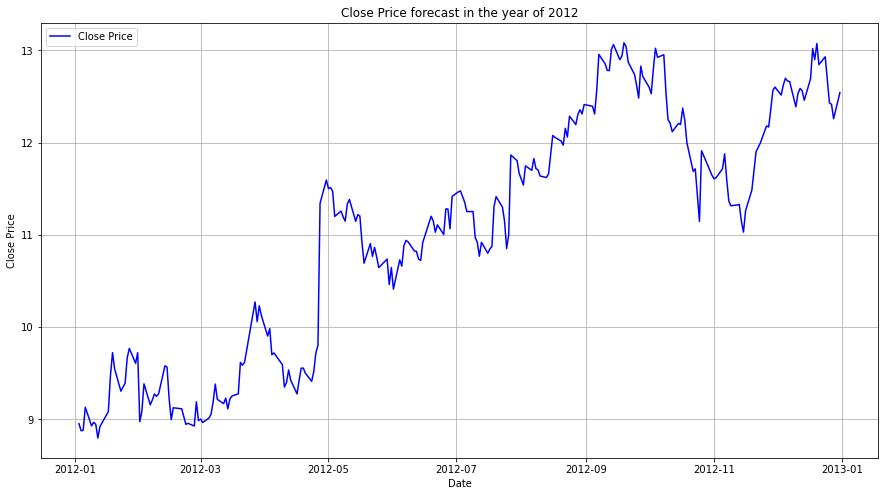

 Maximum price in the year of 2012:  2012-09-19 00:00:00 $ 13.08399963
 Minimum price in the year of 2012:  2012-01-12 00:00:00 $ 8.796500206


In [62]:
max_price_date = data_2012['Date'][ data_2012['Close'].idxmax()]
max_price_value =  data_2012['Close'].max()
min_price_date =  data_2012['Date'][ data_2012['Close'].idxmin()]
min_price_value =  data_2012['Close'].min()


plt.figure(figsize=(15, 8))
plt.plot( data_2012['Date'],  data_2012['Close'], label='Close Price', color='b')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price forecast in the year of 2012')
plt.legend()
plt.grid(True)
plt.show()

print (" Maximum price in the year of 2012: ", max_price_date, "$",max_price_value)
print (" Minimum price in the year of 2012: ", min_price_date, "$",min_price_value)

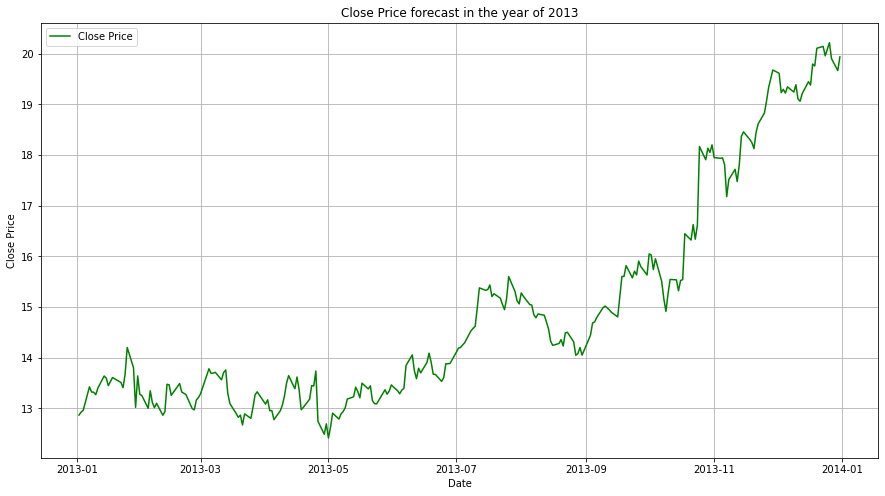

 Maximum price in the year of 2013:  2013-12-26 00:00:00 $ 20.21949959
 Minimum price in the year of 2013:  2013-05-01 00:00:00 $ 12.41149998


In [63]:
max_price_date = data_2013['Date'][ data_2013['Close'].idxmax()]
max_price_value =  data_2013['Close'].max()
min_price_date =  data_2013['Date'][ data_2013['Close'].idxmin()]
min_price_value =  data_2013['Close'].min()


plt.figure(figsize=(15, 8))
plt.plot( data_2013['Date'],  data_2013['Close'], label='Close Price', color='g')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price forecast in the year of 2013')
plt.legend()
plt.grid(True)
plt.show()

print (" Maximum price in the year of 2013: ", max_price_date, "$",max_price_value)
print (" Minimum price in the year of 2013: ", min_price_date, "$",min_price_value)

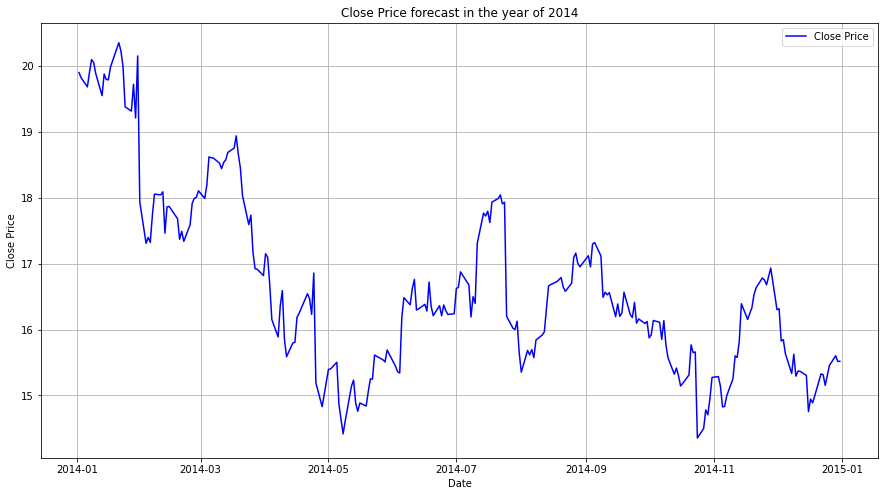

 Maximum price in the year of 2014:  2014-01-21 00:00:00 $ 20.35250092
 Minimum price in the year of 2014:  2014-10-24 00:00:00 $ 14.35299969


In [64]:
max_price_date = data_2014['Date'][ data_2014['Close'].idxmax()]
max_price_value =  data_2014['Close'].max()
min_price_date =  data_2014['Date'][ data_2014['Close'].idxmin()]
min_price_value =  data_2014['Close'].min()


plt.figure(figsize=(15, 8))
plt.plot( data_2014['Date'],  data_2014['Close'], label='Close Price', color='b')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price forecast in the year of 2014')
plt.legend()
plt.grid(True)
plt.show()

print (" Maximum price in the year of 2014: ", max_price_date, "$",max_price_value)
print (" Minimum price in the year of 2014: ", min_price_date, "$",min_price_value)

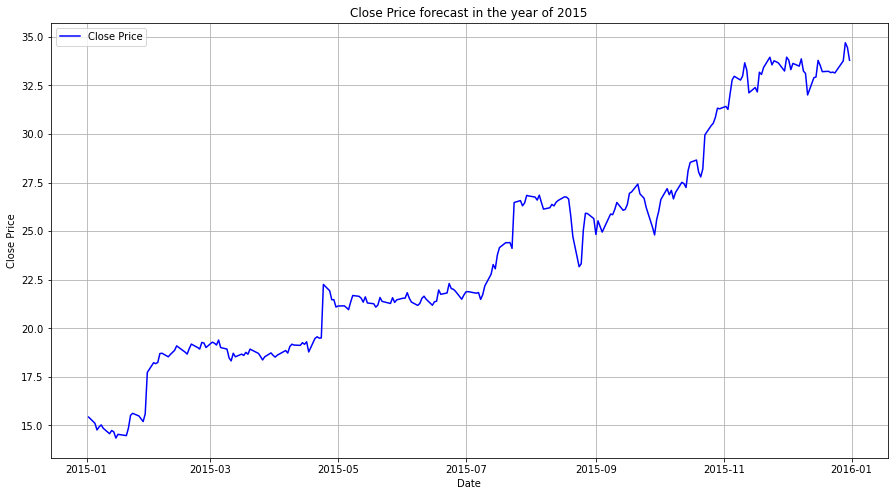

 Maximum price in the year of 2015:  2015-12-29 00:00:00 $ 34.69850159
 Minimum price in the year of 2015:  2015-01-15 00:00:00 $ 14.34749985


In [65]:
max_price_date = data_2015['Date'][ data_2015['Close'].idxmax()]
max_price_value =  data_2015['Close'].max()
min_price_date =  data_2015['Date'][ data_2015['Close'].idxmin()]
min_price_value =  data_2015['Close'].min()


plt.figure(figsize=(15, 8))
plt.plot( data_2015['Date'],  data_2015['Close'], label='Close Price', color='b')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price forecast in the year of 2015')
plt.legend()
plt.grid(True)
plt.show()

print (" Maximum price in the year of 2015: ", max_price_date, "$",max_price_value)
print (" Minimum price in the year of 2015: ", min_price_date, "$",min_price_value)

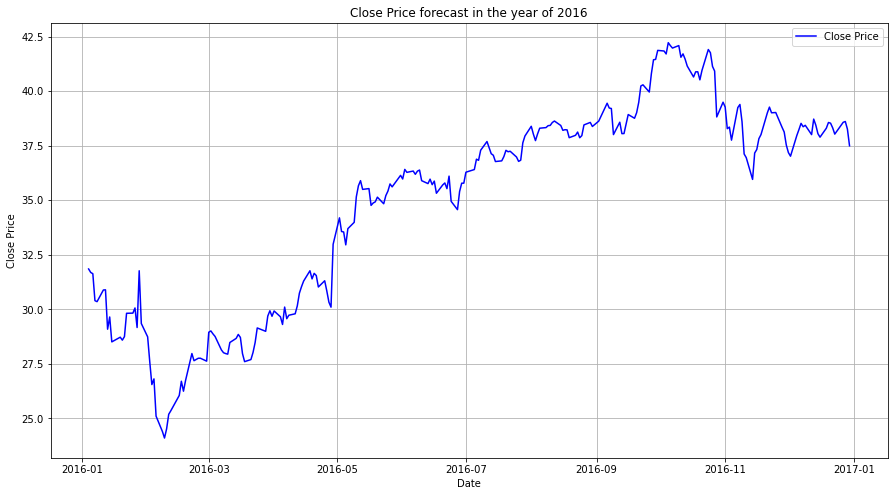

 Maximum price in the year of 2016:  2016-10-05 00:00:00 $ 42.2179985
 Minimum price in the year of 2016:  2016-02-09 00:00:00 $ 24.10350037


In [66]:
max_price_date = data_2016['Date'][ data_2016['Close'].idxmax()]
max_price_value =  data_2016['Close'].max()
min_price_date =  data_2016['Date'][ data_2016['Close'].idxmin()]
min_price_value =  data_2016['Close'].min()


plt.figure(figsize=(15, 8))
plt.plot( data_2016['Date'],  data_2016['Close'], label='Close Price', color='b')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price forecast in the year of 2016')
plt.legend()
plt.grid(True)
plt.show()

print (" Maximum price in the year of 2016: ", max_price_date, "$",max_price_value)
print (" Minimum price in the year of 2016: ", min_price_date, "$",min_price_value)

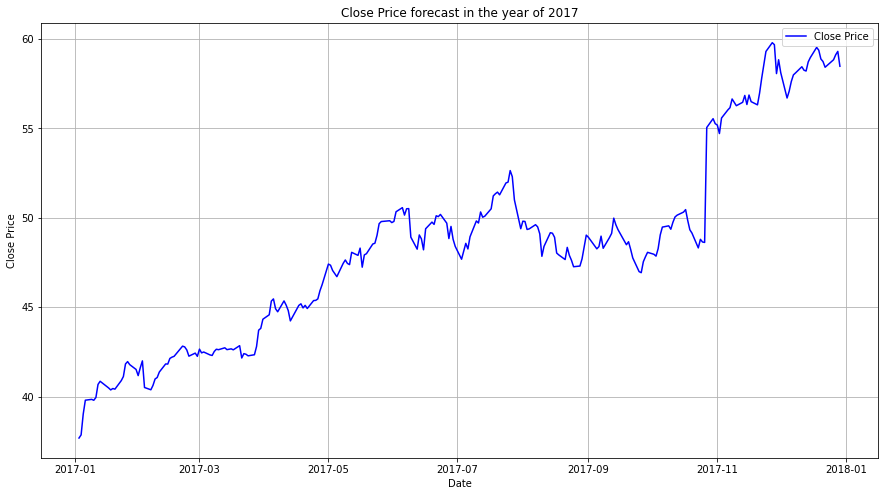

 Maximum price in the year of 2017:  2017-11-27 00:00:00 $ 59.79150009
 Minimum price in the year of 2017:  2017-01-03 00:00:00 $ 37.68349838


In [67]:
max_price_date = data_2017['Date'][ data_2017['Close'].idxmax()]
max_price_value =  data_2017['Close'].max()
min_price_date =  data_2017['Date'][ data_2017['Close'].idxmin()]
min_price_value =  data_2017['Close'].min()


plt.figure(figsize=(15, 8))
plt.plot( data_2017['Date'],  data_2017['Close'], label='Close Price', color='b')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price forecast in the year of 2017')
plt.legend()
plt.grid(True)
plt.show()

print (" Maximum price in the year of 2017: ", max_price_date, "$",max_price_value)
print (" Minimum price in the year of 2017: ", min_price_date, "$",min_price_value)

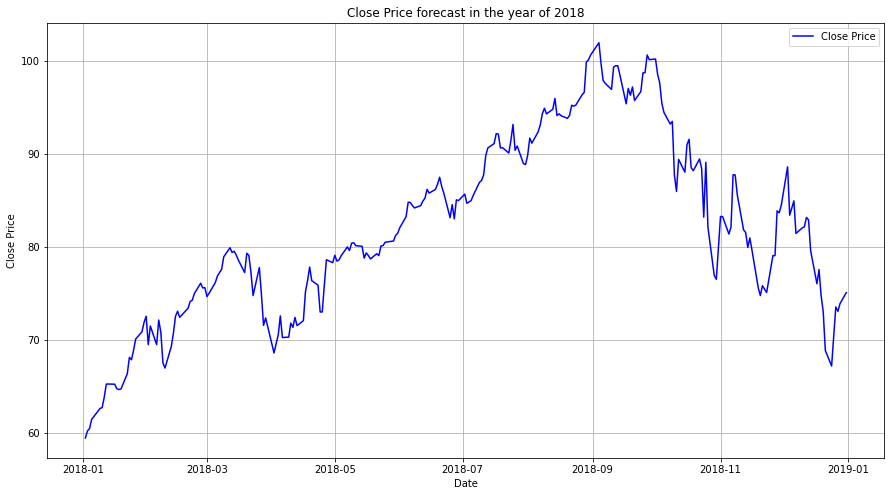

 Maximum price in the year of 2018:  2018-09-04 00:00:00 $ 101.975502
 Minimum price in the year of 2018:  2018-01-02 00:00:00 $ 59.45050049


In [68]:
max_price_date = data_2018['Date'][ data_2018['Close'].idxmax()]
max_price_value =  data_2018['Close'].max()
min_price_date =  data_2018['Date'][ data_2018['Close'].idxmin()]
min_price_value =  data_2018['Close'].min()


plt.figure(figsize=(15, 8))
plt.plot( data_2018['Date'],  data_2018['Close'], label='Close Price', color='b')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price forecast in the year of 2018')
plt.legend()
plt.grid(True)
plt.show()

print (" Maximum price in the year of 2018: ", max_price_date, "$",max_price_value)
print (" Minimum price in the year of 2018: ", min_price_date, "$",min_price_value)

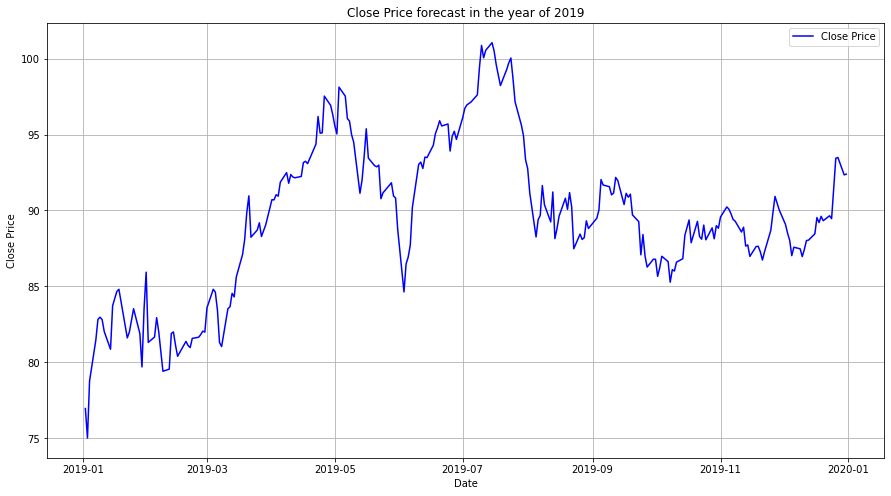

 Maximum price in the year of 2019:  2019-07-15 00:00:00 $ 101.0494995
 Minimum price in the year of 2019:  2019-01-03 00:00:00 $ 75.01399994


In [69]:
max_price_date = data_2019['Date'][ data_2019['Close'].idxmax()]
max_price_value =  data_2019['Close'].max()
min_price_date =  data_2019['Date'][ data_2019['Close'].idxmin()]
min_price_value =  data_2019['Close'].min()


plt.figure(figsize=(15, 8))
plt.plot( data_2019['Date'],  data_2019['Close'], label='Close Price', color='b')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price forecast in the year of 2019')
plt.legend()
plt.grid(True)
plt.show()

print (" Maximum price in the year of 2019: ", max_price_date, "$",max_price_value)
print (" Minimum price in the year of 2019: ", min_price_date, "$",min_price_value)

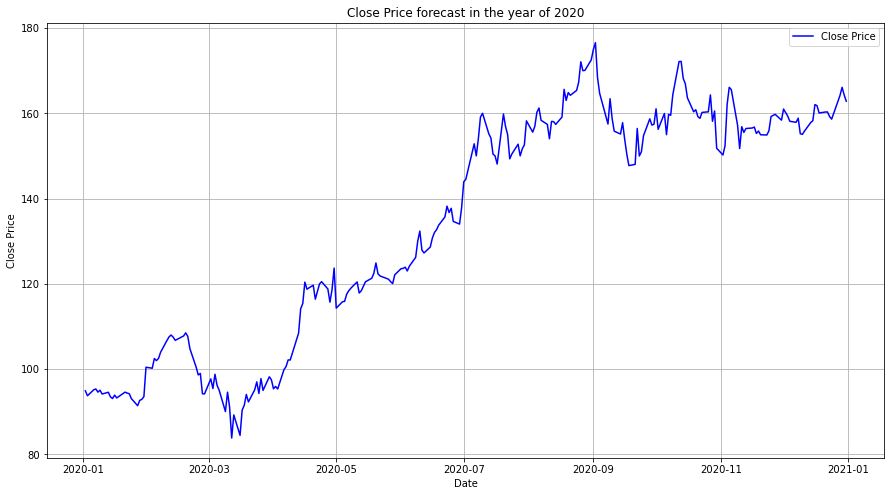

 Maximum price in the year of 2020:  2020-09-02 00:00:00 $ 176.5724945
 Minimum price in the year of 2020:  2020-03-12 00:00:00 $ 83.83049774


In [70]:
max_price_date = data_2020['Date'][ data_2020['Close'].idxmax()]
max_price_value =  data_2020['Close'].max()
min_price_date =  data_2020['Date'][ data_2020['Close'].idxmin()]
min_price_value =  data_2020['Close'].min()


plt.figure(figsize=(15, 8))
plt.plot( data_2020['Date'],  data_2020['Close'], label='Close Price', color='b')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price forecast in the year of 2020')
plt.legend()
plt.grid(True)
plt.show()

print (" Maximum price in the year of 2020: ", max_price_date, "$",max_price_value)
print (" Minimum price in the year of 2020: ", min_price_date, "$",min_price_value)

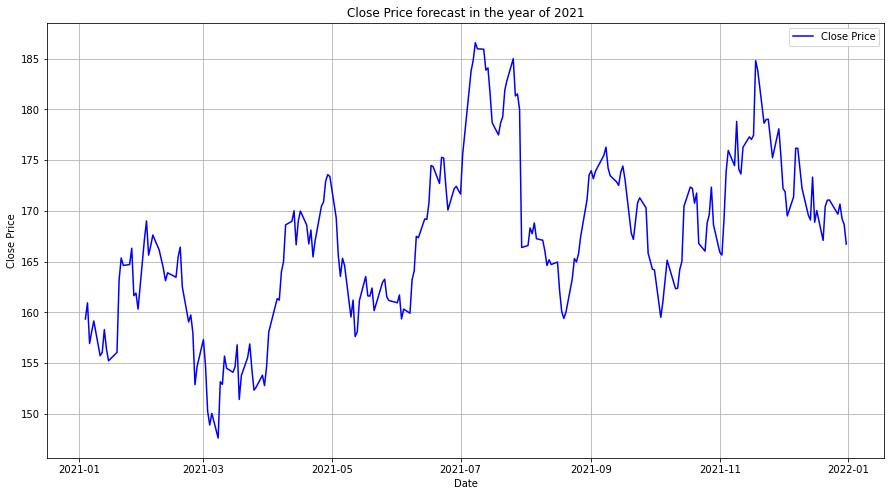

 Maximum price in the year of 2021:  2021-07-08 00:00:00 $ 186.5704956
 Minimum price in the year of 2021:  2021-03-08 00:00:00 $ 147.5975037


In [71]:
max_price_date = data_2021['Date'][ data_2021['Close'].idxmax()]
max_price_value =  data_2021['Close'].max()
min_price_date =  data_2021['Date'][ data_2021['Close'].idxmin()]
min_price_value =  data_2021['Close'].min()


plt.figure(figsize=(15, 8))
plt.plot( data_2021['Date'],  data_2021['Close'], label='Close Price', color='b')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price forecast in the year of 2021')
plt.legend()
plt.grid(True)
plt.show()

print (" Maximum price in the year of 2021: ", max_price_date, "$",max_price_value)
print (" Minimum price in the year of 2021: ", min_price_date, "$",min_price_value)

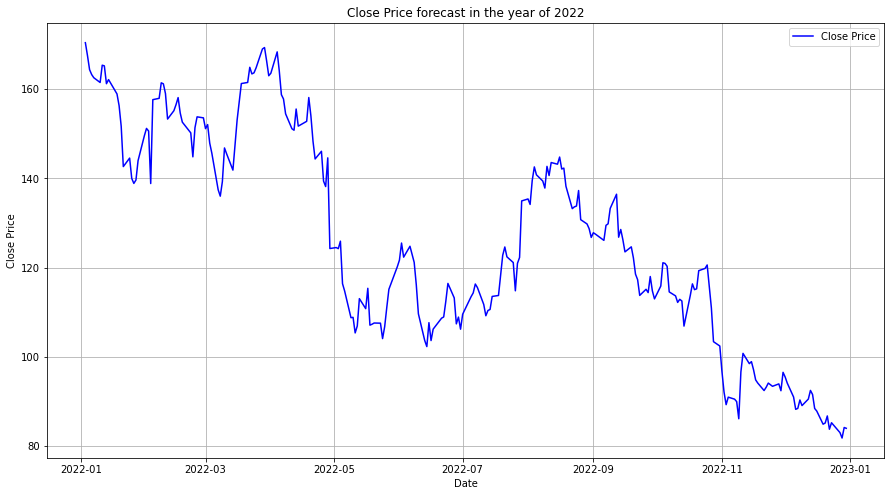

 Maximum price in the year of 2022:  2022-01-03 00:00:00 $ 170.4044952
 Minimum price in the year of 2022:  2022-12-28 00:00:00 $ 81.81999969


In [72]:
max_price_date = data_2022['Date'][ data_2022['Close'].idxmax()]
max_price_value =  data_2022['Close'].max()
min_price_date =  data_2022['Date'][ data_2022['Close'].idxmin()]
min_price_value =  data_2022['Close'].min()


plt.figure(figsize=(15, 8))
plt.plot( data_2022['Date'],  data_2022['Close'], label='Close Price', color='b')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price forecast in the year of 2022')
plt.legend()
plt.grid(True)
plt.show()

print (" Maximum price in the year of 2022: ", max_price_date, "$",max_price_value)
print (" Minimum price in the year of 2022: ", min_price_date, "$",min_price_value)

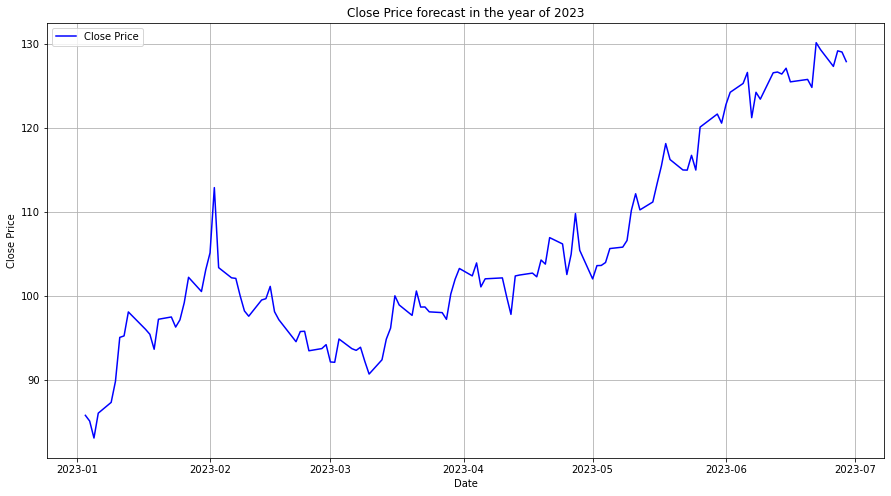

 Maximum price in the year of 2023:  2023-06-22 00:00:00 $ 130.1499939
 Minimum price in the year of 2023:  2023-01-05 00:00:00 $ 83.12000275


In [73]:
max_price_date = data_2023['Date'][ data_2023['Close'].idxmax()]
max_price_value =  data_2023['Close'].max()
min_price_date =  data_2023['Date'][ data_2023['Close'].idxmin()]
min_price_value =  data_2023['Close'].min()


plt.figure(figsize=(15, 8))
plt.plot( data_2023['Date'],  data_2023['Close'], label='Close Price', color='b')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price forecast in the year of 2023')
plt.legend()
plt.grid(True)
plt.show()

print (" Maximum price in the year of 2023: ", max_price_date, "$",max_price_value)
print (" Minimum price in the year of 2023: ", min_price_date, "$",min_price_value)

## Volume of Sales

Volume is the amount of an asset or security that changes hands over some period of time, often over the course of a day. For instance, the stock trading volume would refer to the number of shares of security traded between its daily open and close. Trading volume, and changes to volume over the course of time, are important inputs for technical traders.

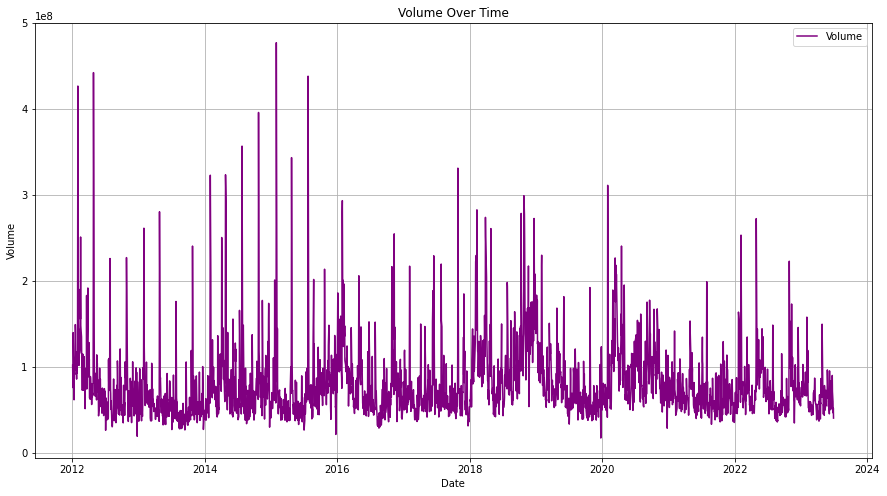

 Maximum Volume in the year during 2012-2023:  477122000 , 2015-01-30 00:00:00
 Minimum Volume in the year during 2012-2023:  17626000 , 2019-12-24 00:00:00


In [74]:
max_volume_date = Data['Date'][Data['Volume'].idxmax()]
max_volume_value = Data['Volume'].max()
min_volume_date = Data['Date'][Data['Volume'].idxmin()]
min_volume_value = Data['Volume'].min()


plt.figure(figsize=(15, 8))
plt.plot(Data['Date'], Data['Volume'], label='Volume', color='purple')
plt.xlabel('Date')
plt.ylabel('Volume')
plt.title('Volume Over Time')
plt.legend()
plt.grid(True)

plt.show()

print (" Maximum Volume in the year during 2012-2023: ", max_volume_value, ",",  max_volume_date)
print (" Minimum Volume in the year during 2012-2023: ",  min_volume_value,",", min_volume_date)

## Moving Average Analysis
The primary objective of all moving averages is to identify trends of a financial instrument based on its previous price points. They are, thus, referred to as lagging indicators.

Moving averages cannot predict any change in future prices; they can only confirm if there have been any changes in a stock’s trends.

In [75]:
Data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume',
       'EPS (Earnings Per Share)', 'Year_High', 'Year_Low', 'Pivot Point',
       'Resistance1', 'Resistance2', 'Support1', 'Support2', 'SMA10', 'SMA50',
       'SMA100', 'EMA10', 'EMA50', 'EMA100', 'EMA12', 'EMA26', 'Middle_Band',
       'Upper_Band', 'Lower_Band', 'NAV', 'Price/Nav'],
      dtype='object')

### Simple Moving Average

The Simple Moving Average (SMA) calculates the unweighted mean of the previous M or N points. We prefer selecting sliding window data points based on the amount of smoothing, as increasing the value of M or N improves smoothing but reduces accuracy.

We have calculated 10, 50, 100 days moving averages for determining the trend
SMA = (A1 + A2 + ……….+An) / n
Where:
A is the average in period n
n is the number of periods

1.	SMA-10: SMA-10 means  with a period of 10 calculates the average of the last 10 data points in a time series 
2.	SMA-50: SMA-50 means  with a period of 50 calculates the average of the last 50 data points in a time series.
3.	SMA-100: SMA-100 means  with a period of 100 calculates the average of the last 100 data points in a time series.
4.	SMA-200: SMA-200 means  with a period of 200 calculates the average of the last 200 data points in a time series.

price changes in a time series. It's commonly used to identify trends and potential entry/exit points in trading.


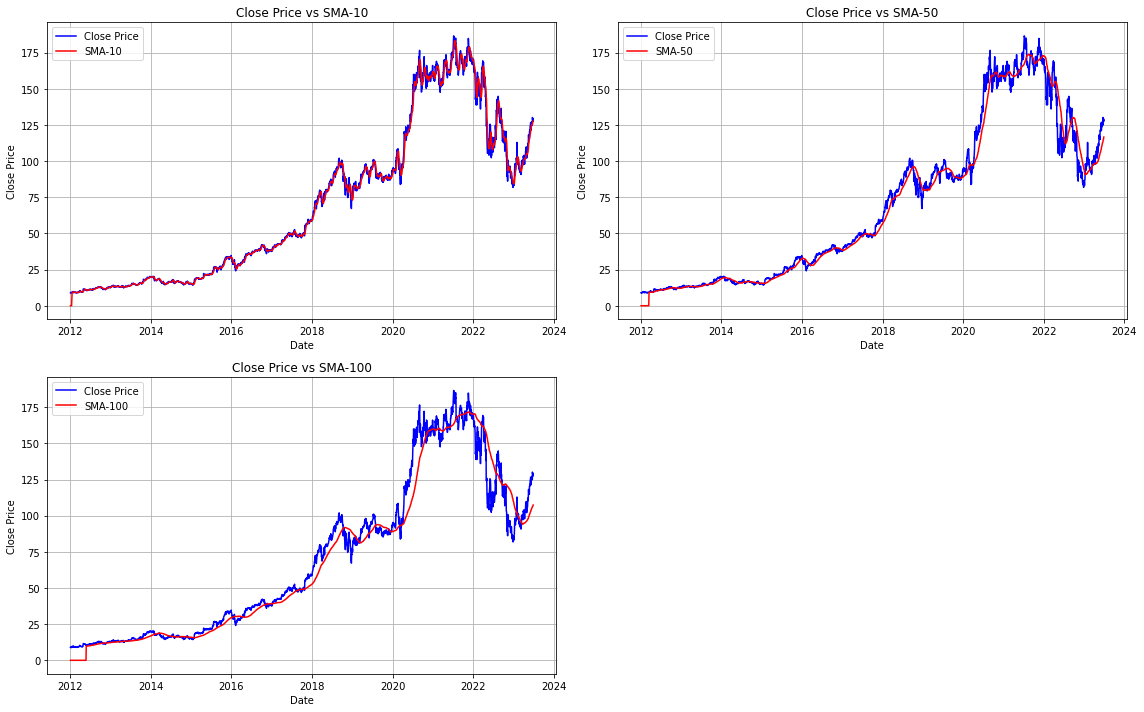

In [81]:
plt.figure(figsize=(16, 10)) 

# Plot 1:
plt.subplot(2, 2, 1)
plt.plot(Data['Date'], Data['Close'], label='Close Price', color='b')
plt.plot(Data['Date'], Data['SMA10'], label='SMA-10', color='r')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price vs SMA-10')
plt.legend()
plt.grid(True)

#Plot 2:
plt.subplot(2, 2, 2)
plt.plot(Data['Date'], Data['Close'], label='Close Price', color='b')
plt.plot(Data['Date'], Data['SMA50'], label='SMA-50', color='r')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price vs SMA-50')
plt.legend()
plt.grid(True)

#Plot 3:
plt.subplot(2, 2, 3)
plt.plot(Data['Date'], Data['Close'], label='Close Price', color='b')
plt.plot(Data['Date'], Data['SMA100'], label='SMA-100', color='r')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price vs SMA-100')
plt.legend()
plt.grid(True)


plt.tight_layout()
plt.show()

### Exponential Moving Averages (EMA)

Exponential Moving Average A type of moving average that gives more weight to recent data points, making it more responsive to recent price changes in a time series. It's commonly used to identify trends and potential entry/exit points in trading.

EMA was formulated to overcome certain limitations of SMA. There are 3 steps involved in the calculation of EMA. These include the following:

1. Calculation of Simple moving averages
2. Computation of multiplier
3. Computation of current exponential moving averages

EMA = [Closing Price of the Stock x the Multiplier] + [Previous Day EMA x (1- the Multiplier)]

We have calculated 10,12, 26, 50 , 100 days Exponential moving averages

In [37]:
Data.columns

Index(['Date', 'Open', 'High', 'Low', 'Close', 'Volume',
       'EPS (Earnings Per Share)', 'Year_High', 'Year_Low', 'Pivot Point',
       'Resistance1', 'Resistance2', 'Support1', 'Support2', 'SMA10', 'SMA50',
       'SMA100', 'EMA10', 'EMA50', 'EMA100', 'EMA12', 'EMA26', 'Middle_Band',
       'Upper_Band', 'Lower_Band', 'NAV', 'Price/Nav'],
      dtype='object')

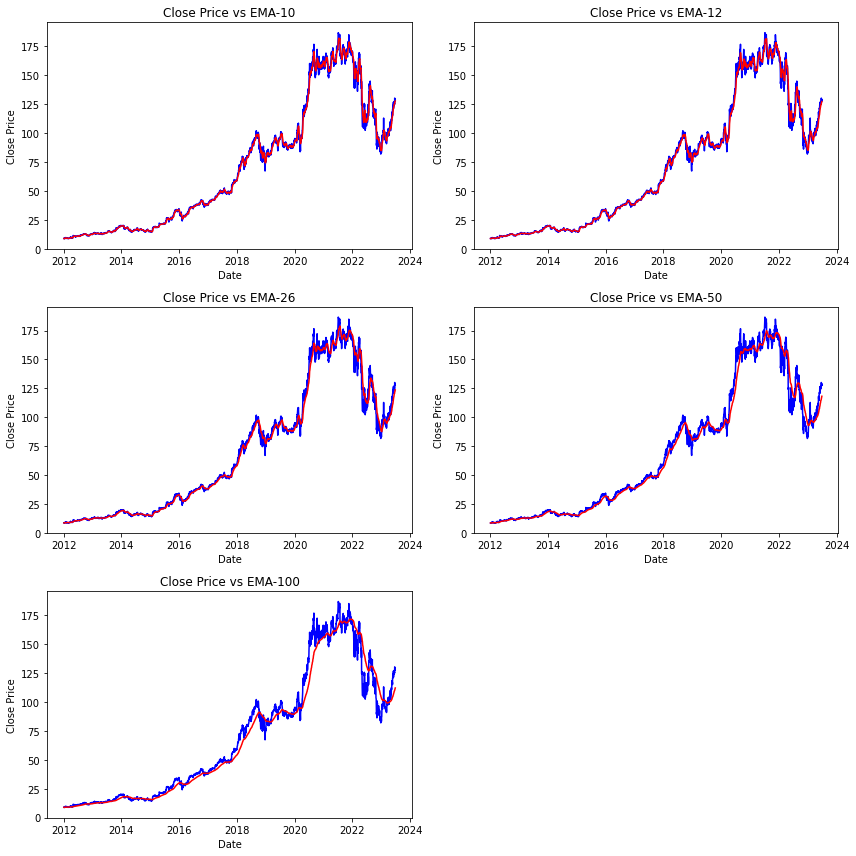

In [50]:
plt.figure(figsize=(12, 12)) 

# Plot 1:
plt.subplot(3, 2, 1)
plt.plot(Data['Date'], Data['Close'], label='Close Price', color='b')
plt.plot(Data['Date'], Data['EMA10'], label='EMA-10', color='r')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price vs EMA-10')

# Plot 2:
plt.subplot(3, 2, 2)
plt.plot(Data['Date'], Data['Close'], label='Close Price', color='b')
plt.plot(Data['Date'], Data['EMA12'], label='EMA-12', color='r')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price vs EMA-12')

# Plot 3:
plt.subplot(3, 2, 3)
plt.plot(Data['Date'], Data['Close'], label='Close Price', color='b')
plt.plot(Data['Date'], Data['EMA26'], label='EMA-26', color='r')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price vs EMA-26')

# Plot 4:
plt.subplot(3, 2, 4)
plt.plot(Data['Date'], Data['Close'], label='Close Price', color='b')
plt.plot(Data['Date'], Data['EMA50'], label='EMA-50', color='r')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price vs EMA-50')

# Plot 5:
plt.subplot(3, 2, 5)
plt.plot(Data['Date'], Data['Close'], label='Close Price', color='b')
plt.plot(Data['Date'], Data['EMA100'], label='EMA-100', color='r')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.title('Close Price vs EMA-100')

plt.tight_layout()
plt.show()

### Features of EMA:

1. Identifies and Confirms the Market Trend: This is one of the fundamental functions of EMA. When an EMA line is going in an upward direction, it denotes an uptrend, whereas when it goes down, it indicates a downtrend. Usually, if the EMA line is above the price of the asset, it is likely to fall next. But, if the price level is above the EMA line, it is an indicator that the value of an asset will continue to increase. Hence, traders are able to identify the buy and sell signals with the EMA working as a chart indicator.

2. Act as Support and Resistance Bands: Similar to the other moving averages, exponential moving average also acts as resistance and support bands for the prices of a financial instrument. Also referred to as floors, support levels are predetermined prices of financial instruments beyond which they cannot fall. Conversely, a resistance level is a predetermined price limit of a financial instrument beyond which its price cannot rise. Resistance levels are also referred to as ceilings.

3. Sensitive to Price Movements: An EMA is considerably faster than an SMA in reflecting rapid fluctuations in the price levels of a financial instrument. Thus, EMAs are also able to identify trends faster than SMAs.